# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010 - 2016)


Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

# 🌱 Greenhouse Gas Emission Prediction Project

![GHG Emissions](https://www.shalom-education.com/wp-content/uploads/2022/12/Shutterstock_1667551381-1-1024x1006.jpg)

**Project Goal:**  
To analyze and predict greenhouse gas (GHG) emissions from various U.S. industries and commodities using the official dataset from [data.gov](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities).

![GHG Emissions](https://edg.epa.gov/EPALogo.svg)

**Source:**  
[Supply Chain Greenhouse Gas Emission Factors](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities)

  
**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn  


## 📂 Dataset Overview

This dataset contains supply chain emission factors associated with various U.S. industries and commodities.

**Key Columns:**
- `Code`: Industry classification code
- `Industry_Name`: Name of the industry
- `Commodity`: Item or commodity name
- `GHG_Emissions_kgCO2e`: GHG emissions per unit (kg CO2 equivalent)
- `Units`: Measurement units (e.g., [kg/2018 USD, purchaser price])


## 🧹 Data Preprocessing

Steps:
- Handle missing values
- Convert units where needed
- Encode categorical features
- Normalize/scale numeric columns




##### Steps:
- Step 1: Import Required Libraries
- Step 2: Load Dataset
- Step 3: Data Preprocessing (EDA+Cleaning+Encoding)


STEP 1: import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Step 2 : load the dataset
as it is an excel file with multiple excel sheets we need to follow the below steps.


In [2]:
import pandas as pd

excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years = range(2010, 2017)

all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={'Commodity Code': 'Code', 'Commodity Name': 'Name'}, inplace=True)
        df_ind.rename(columns={'Industry Code': 'Code', 'Industry Name': 'Name'}, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

        print(f"✅ Loaded {year}")
    except Exception as e:
        print(f"❌ Error in {year}: {e}")

final_df = pd.concat(all_data, ignore_index=True)


✅ Loaded 2010
✅ Loaded 2011
✅ Loaded 2012
✅ Loaded 2013
✅ Loaded 2014
✅ Loaded 2015
✅ Loaded 2016


In [3]:
final_df.info()
final_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [4]:
#checking for missing values
final_df.isnull().sum()


,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [5]:
# Drop the Unnamed: 7 column
final_df.drop(columns=['Unnamed: 7'], inplace=True)


In [6]:
#Recheck nulls to ensure it's clean
final_df.isnull().sum()


,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


In [7]:
# Renaming long columns in order to make the naming easier
final_df.rename(columns={
    'Supply Chain Emission Factors without Margins': 'Emission_Without_Margin',
    'Margins of Supply Chain Emission Factors': 'Emission_Margin',
    'Supply Chain Emission Factors with Margins': 'Emission_With_Margin',
    'DQ ReliabilityScore of Factors without Margins': 'DQ_Reliability',
    'DQ TemporalCorrelation of Factors without Margins': 'DQ_Temporal',
    'DQ GeographicalCorrelation of Factors without Margins': 'DQ_Geographical',
    'DQ TechnologicalCorrelation of Factors without Margins': 'DQ_Technological',
    'DQ DataCollection of Factors without Margins': 'DQ_DataCollection'
}, inplace=True)

In [8]:
# saving the cleaned data in a csv file
final_df.to_csv("Cleaned_GHG_Data_2010_2016.csv", index=False)


In [9]:
final_df.head(10)

,Code,Name,Substance,Unit,Emission_Without_Margin,Emission_Margin,Emission_With_Margin,DQ_Reliability,DQ_Temporal,DQ_Geographical,DQ_Technological,DQ_DataCollection,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,4,3,1,4,1,Commodity,2010
5,1111B0,"Fresh wheat, corn, rice, and other grains",methane,"kg/2018 USD, purchaser price",0.008,0.001,0.009,2,3,1,1,1,Commodity,2010
6,1111B0,"Fresh wheat, corn, rice, and other grains",nitrous oxide,"kg/2018 USD, purchaser price",0.004,0.000,0.004,4,3,1,4,1,Commodity,2010
7,1111B0,"Fresh wheat, corn, rice, and other grains",other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,3,3,1,3,1,Commodity,2010
8,111200,"Fresh vegetables, melons, and potatoes",carbon dioxide,"kg/2018 USD, purchaser price",0.183,0.132,0.315,3,3,1,4,1,Commodity,2010
9,111200,"Fresh vegetables, melons, and potatoes",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,3,1,1,1,Commodity,2010


In [10]:
# checking for columns
final_df.columns

Index(['Code', 'Name', 'Substance', 'Unit', 'Emission_Without_Margin',
       'Emission_Margin', 'Emission_With_Margin', 'DQ_Reliability',
       'DQ_Temporal', 'DQ_Geographical', 'DQ_Technological',
       'DQ_DataCollection', 'Source', 'Year'],
      dtype='object')

In [11]:
# Fill with mean or median (recommended for numeric columns)
final_df['Emission_With_Margin'].fillna(final_df['Emission_With_Margin'].mean(), inplace=True)

# OR, drop rows with any nulls (less recommended unless minimal loss)
# final_df.dropna(inplace=True)


/tmp/ipython-input-11-3298790099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Emission_With_Margin'].fillna(final_df['Emission_With_Margin'].mean(), inplace=True)


In [12]:
#Checking for duplicates
final_df.duplicated().sum()  # How many duplicates?

# If duplicates exist, drop them:
final_df.drop_duplicates(inplace=True)


In [13]:
# checking for datatypes
final_df.dtypes


,0
Code,object
Name,object
Substance,object
Unit,object
Emission_Without_Margin,float64
Emission_Margin,float64
Emission_With_Margin,float64
DQ_Reliability,int64
DQ_Temporal,int64
DQ_Geographical,int64


In [14]:
print("✅ Cleaned DataFrame shape:", final_df.shape)
final_df.head()


✅ Cleaned DataFrame shape: (22092, 14)


,Code,Name,Substance,Unit,Emission_Without_Margin,Emission_Margin,Emission_With_Margin,DQ_Reliability,DQ_Temporal,DQ_Geographical,DQ_Technological,DQ_DataCollection,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,4,3,1,4,1,Commodity,2010


# week 2 work


VISAUALISATION:
univariate : one variable   using histograms
bivariate : two variable   
multivariable : many variable   is there any correlation exists or not

tells us how the data is distribute

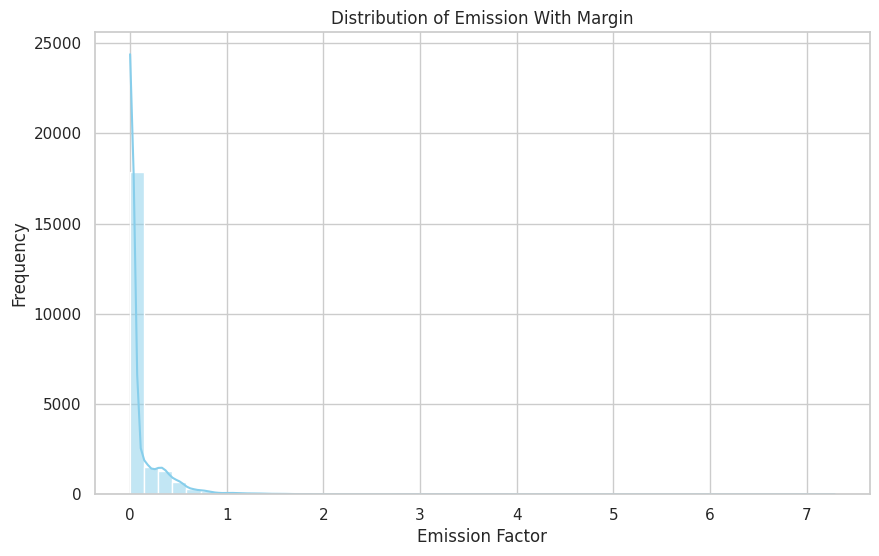

In [15]:
# Visualize distribution  histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='Emission_With_Margin', bins=50, kde=True, color='skyblue')

plt.title('Distribution of Emission With Margin')
plt.xlabel('Emission Factor')
plt.ylabel('Frequency')
plt.show()


In [16]:
final_df.dtypes


,0
Code,object
Name,object
Substance,object
Unit,object
Emission_Without_Margin,float64
Emission_Margin,float64
Emission_With_Margin,float64
DQ_Reliability,int64
DQ_Temporal,int64
DQ_Geographical,int64


In [17]:
categorical_cols = final_df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)



Categorical Columns:
 Index(['Code', 'Name', 'Substance', 'Unit', 'Source'], dtype='object')


In [18]:
for col in categorical_cols:
    print(f"\n{col} - Unique Values:")
    print(final_df[col].unique())




Code - Unique Values:
['1111A0' '1111B0' '111200' '111300' '111400' '111900' '112120' '1121A0'
 '112300' '112A00' '113000' '114000' '115000' '211000' '212100' '212230'
 '2122A0' '212310' '2123A0' '213111' '21311A' '221100' '221200' '221300'
 '230301' '230302' '233210' '233230' '233240' '233262' '2332A0' '2332C0'
 '2332D0' '233411' '233412' '2334A0' '311111' '311119' '311210' '311221'
 '311224' '311225' '311230' '311300' '311410' '311420' '311513' '311514'
 '31151A' '311520' '311615' '31161A' '311700' '311810' '3118A0' '311910'
 '311920' '311930' '311940' '311990' '312110' '312120' '312130' '312140'
 '312200' '313100' '313200' '313300' '314110' '314120' '314900' '315000'
 '316000' '321100' '321200' '321910' '3219A0' '322110' '322120' '322130'
 '322210' '322220' '322230' '322291' '322299' '323110' '323120' '324110'
 '324121' '324122' '324190' '325110' '325120' '325130' '325180' '325190'
 '325211' '3252A0' '325310' '325320' '325411' '325412' '325413' '325414'
 '325510' '325520' '325610' 

In [19]:
#check catagorical values
print(final_df['Substance'].value_counts())


Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [21]:
# View value counts for key categorical columns
print(final_df['Substance'].value_counts())
print(final_df['Unit'].value_counts())
print(final_df['Unit'].unique())
print(final_df['Source'].value_counts())
print(final_df['Substance'].unique())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64
Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64
['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']
Source
Industry     11060
Commodity    11032
Name: count, dtype: int64
['carbon dioxide' 'methane' 'nitrous oxide' 'other GHGs']


In [22]:
# Map categorical values to integers for modeling
substance_map = {'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}
final_df['Substance'] = final_df['Substance'].map(substance_map)

In [23]:
unit_map = {
    'kg/2018 USD, purchaser price': 0,
    'kg CO2e/2018 USD, purchaser price': 1
}

In [24]:
final_df['Unit'] = final_df['Unit'].map(unit_map)

source_map = {'Commodity': 0, 'Industry': 1}
final_df['Source'] = final_df['Source'].map(source_map)


In [25]:
# Check final mappings
print(final_df['Substance'].unique())
print(final_df['Unit'].unique())
print(final_df['Source'].unique())


[0 1 2 3]
[0 1]
[0 1]


In [26]:
# Info and overview
final_df.info()
print(final_df['Code'].unique())
print(final_df['Name'].unique())
print(len(final_df['Name'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     22092 non-null  object 
 1   Name                     22092 non-null  object 
 2   Substance                22092 non-null  int64  
 3   Unit                     22092 non-null  int64  
 4   Emission_Without_Margin  22092 non-null  float64
 5   Emission_Margin          22092 non-null  float64
 6   Emission_With_Margin     22092 non-null  float64
 7   DQ_Reliability           22092 non-null  int64  
 8   DQ_Temporal              22092 non-null  int64  
 9   DQ_Geographical          22092 non-null  int64  
 10  DQ_Technological         22092 non-null  int64  
 11  DQ_DataCollection        22092 non-null  int64  
 12  Source                   22092 non-null  int64  
 13  Year                     22092 non-null  int64  
dtypes: float64(3), int64(9

In [28]:
# Info and overview
final_df.info()
if 'Name' in final_df.columns:
    print(final_df['Code'].unique())
    print(final_df['Name'].unique())
    print(len(final_df['Name'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     22092 non-null  object 
 1   Name                     22092 non-null  object 
 2   Substance                22092 non-null  int64  
 3   Unit                     22092 non-null  int64  
 4   Emission_Without_Margin  22092 non-null  float64
 5   Emission_Margin          22092 non-null  float64
 6   Emission_With_Margin     22092 non-null  float64
 7   DQ_Reliability           22092 non-null  int64  
 8   DQ_Temporal              22092 non-null  int64  
 9   DQ_Geographical          22092 non-null  int64  
 10  DQ_Technological         22092 non-null  int64  
 11  DQ_DataCollection        22092 non-null  int64  
 12  Source                   22092 non-null  int64  
 13  Year                     22092 non-null  int64  
dtypes: float64(3), int64(9

In [42]:
print(final_df.columns)


Index(['Code', 'Name', 'Substance', 'Unit', 'Emission_Without_Margin',
       'Emission_Margin', 'Emission_With_Margin', 'DQ_Reliability',
       'DQ_Temporal', 'DQ_Geographical', 'DQ_Technological',
       'DQ_DataCollection', 'Source', 'Year'],
      dtype='object')


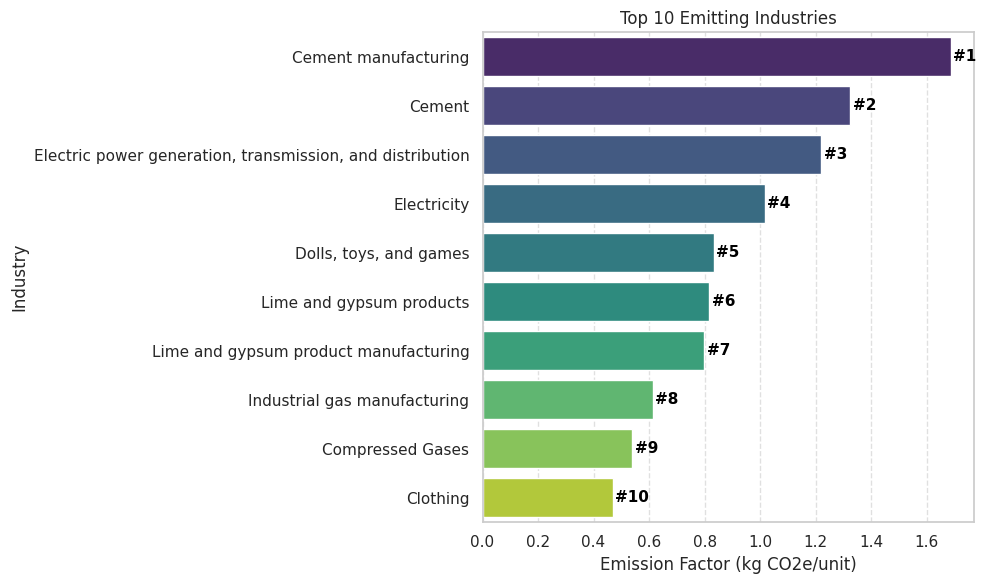

In [43]:
top_emitters = final_df[['Name', 'Emission_With_Margin']].groupby('Name').mean().sort_values(
    by='Emission_With_Margin', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Emission_With_Margin',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis'
)

# Add ranking labels
for i, (value, name) in enumerate(zip(top_emitters['Emission_With_Margin'], top_emitters['Name']), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries')
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-44-840091689.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


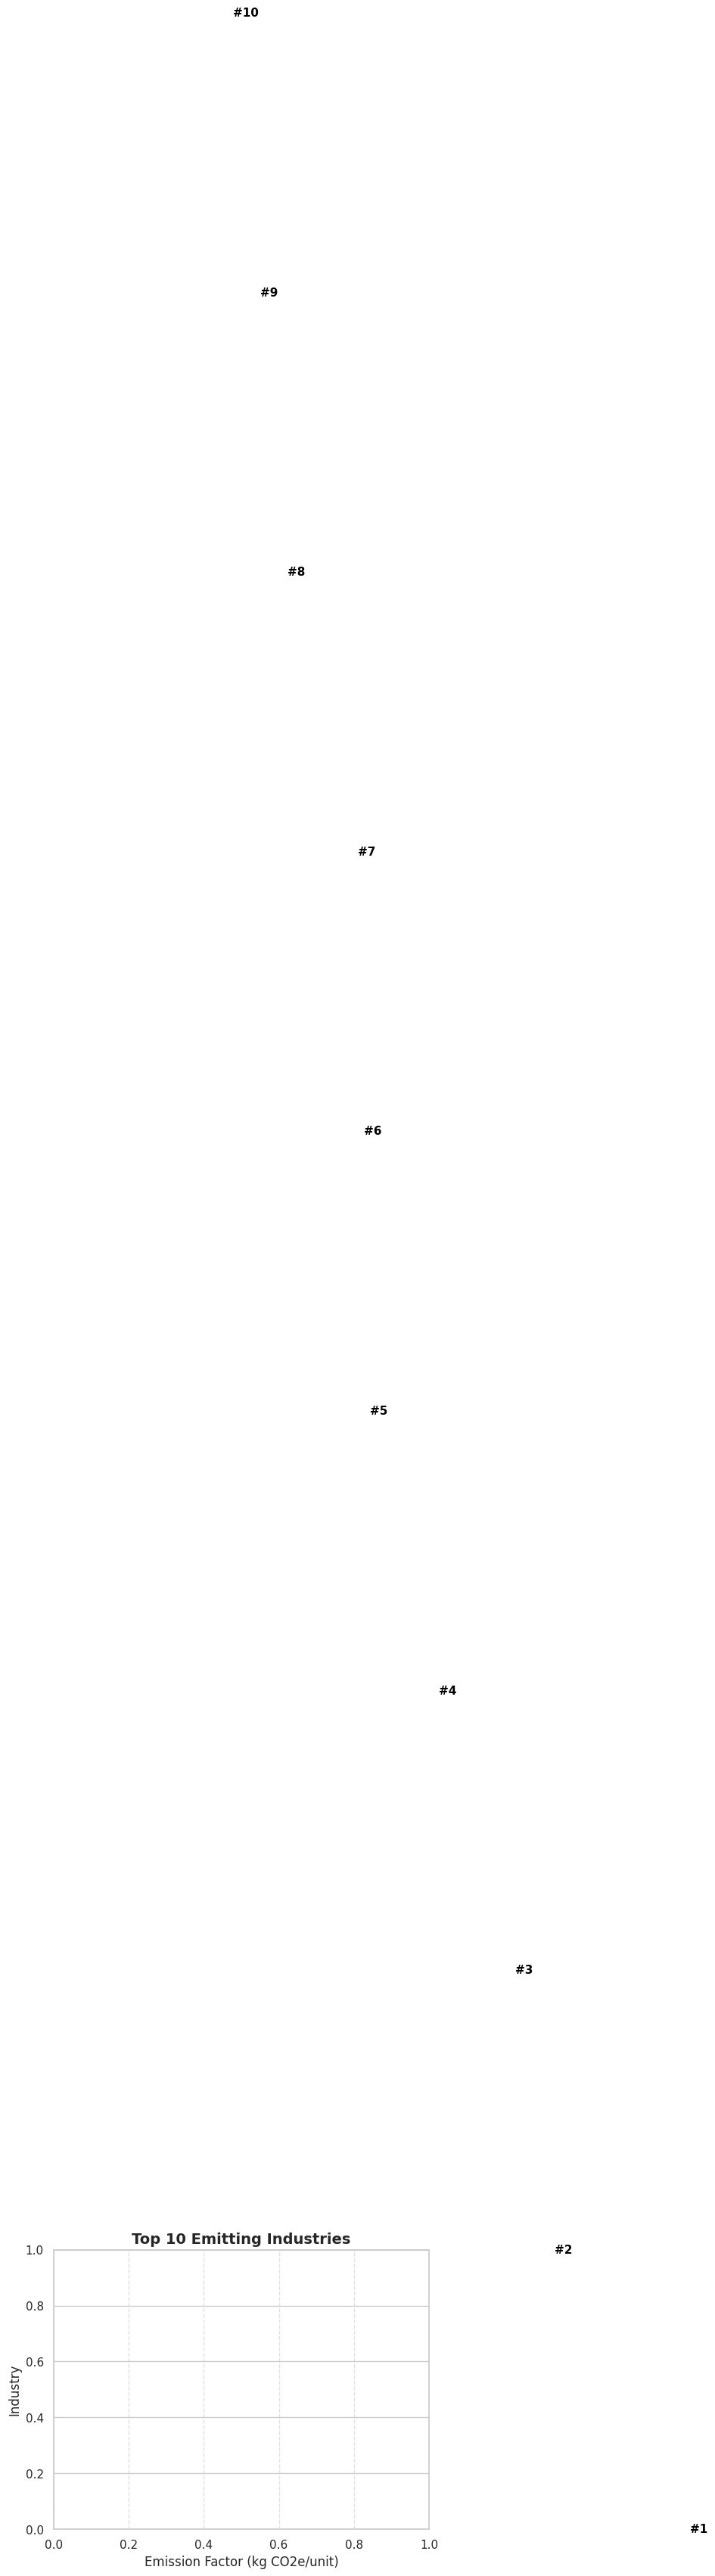

In [44]:
# Add ranking labels
for i, (value, name) in enumerate(zip(top_emitters['Emission_With_Margin'], top_emitters['Name']), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
# Drop non-numeric and unneeded columns
for col in ['Name', 'Code', 'Year']:
    if col in final_df.columns:
        final_df.drop(columns=[col], inplace=True)


In [46]:
print(final_df.head(1))
print("Shape of final dataset:", final_df.shape)

   Substance  Unit  Emission_Without_Margin  Emission_Margin  \
0          0     0                    0.398            0.073   

   Emission_With_Margin  DQ_Reliability  DQ_Temporal  DQ_Geographical  \
0                  0.47               4            3                1   

   DQ_Technological  DQ_DataCollection  Source  
0                 4                  1       0  
Shape of final dataset: (22092, 11)


In [47]:
#  Define Features and Target
X = final_df.drop(columns=['Emission_With_Margin'])
y = final_df['Emission_With_Margin']

print("Feature Sample:\n", X.head())
print("Target Sample:\n", y.head())


Feature Sample:
    Substance  Unit  Emission_Without_Margin  Emission_Margin  DQ_Reliability  \
0          0     0                    0.398            0.073               4   
1          1     0                    0.001            0.001               4   
2          2     0                    0.002            0.000               4   
3          3     1                    0.002            0.000               3   
4          0     0                    0.659            0.081               4   

   DQ_Temporal  DQ_Geographical  DQ_Technological  DQ_DataCollection  Source  
0            3                1                 4                  1       0  
1            3                1                 1                  1       0  
2            3                1                 4                  1       0  
3            3                1                 3                  1       0  
4            3                1                 4                  1       0  
Target Sample:
 0    0.470
1

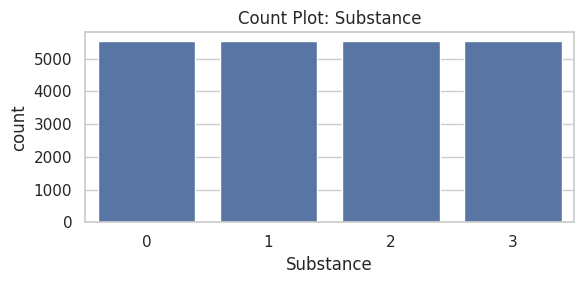

In [48]:
#  Univariate Analysis
plt.figure(figsize=(6, 3))
sns.countplot(x=final_df['Substance'])
plt.title("Count Plot: Substance")
plt.tight_layout()
plt.show()

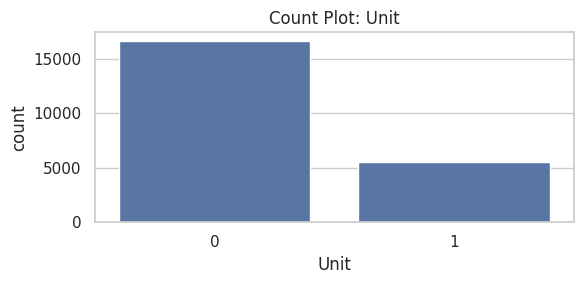

In [49]:
plt.figure(figsize=(6, 3))
sns.countplot(x=final_df['Unit'])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

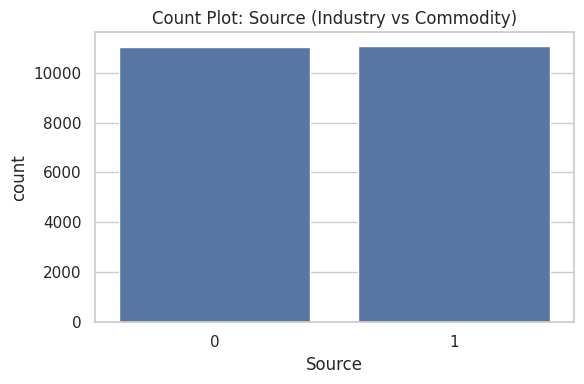

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x=final_df['Source'])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

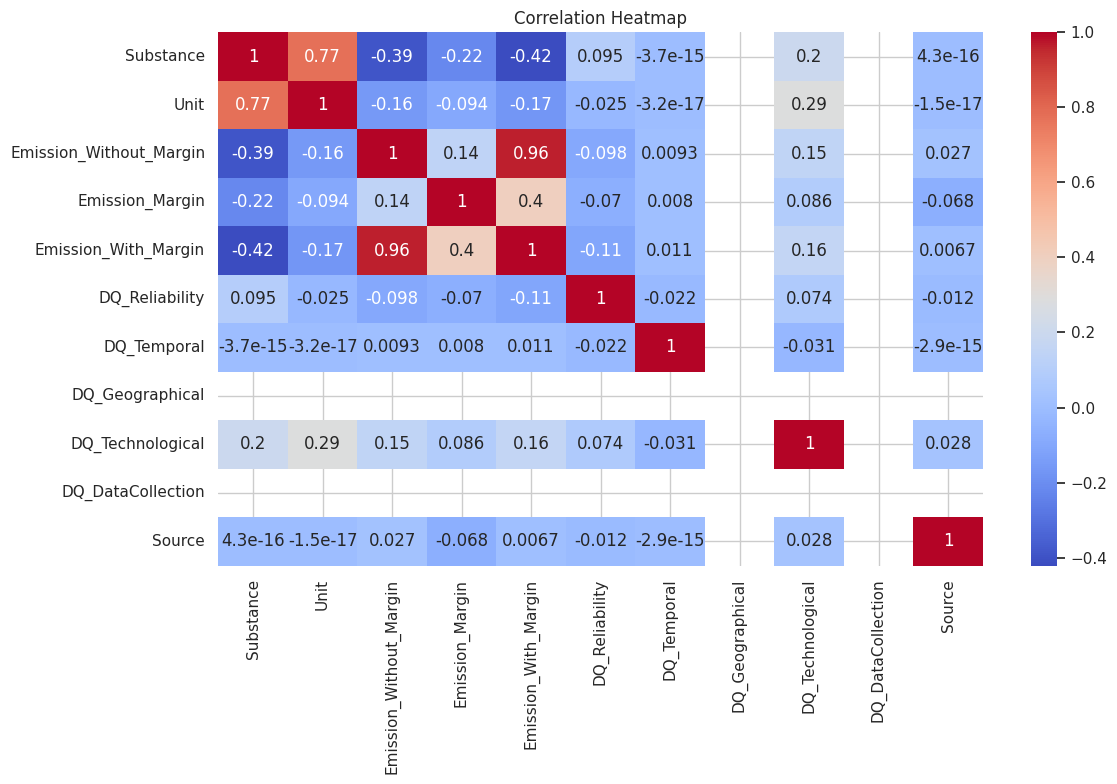

In [51]:
#  Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()